In [1]:
#Hong Kong Hang Seng Options Tracker 香港恆生指數選擇權績效追蹤
#Chi-Sheng Lo 羅祺勝
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Load the Excel file
excel_file = pd.ExcelFile('D:\Derivatives Trading\Mini Hang Seng.xlsm')

In [3]:
# Get the sheet you want to read
sheet_name = 'For Python' # Replace with the name of the sheet you want to read
df = excel_file.parse(sheet_name)

In [4]:
# Output data information
print(df)

          Date   PnL Index  Hang Seng  HSI VIX   Returns
0   2023-12-12  100.000000   16374.50    23.90  0.000000
1   2023-12-13   99.959994   16228.75    22.84 -0.000400
2   2023-12-14  100.597928   16403.19    22.36  0.006362
3   2023-12-15   98.398183   16792.19    22.49 -0.022109
4   2023-12-18   98.298163   16629.23    22.81 -0.001017
..         ...         ...        ...      ...       ...
96  2024-05-07  120.907550   18479.37    22.94  0.002009
97  2024-05-08  121.044587   18313.86    22.04  0.001133
98  2024-05-09  121.767173   18537.81    21.86  0.005952
99  2024-05-10  121.970712   18963.68    22.27  0.001670
100 2024-05-13  122.361832   19115.06    22.39  0.003202

[101 rows x 5 columns]


In [5]:
#******Plotting setup*****#
# Generate some data
Date = df["Date"]
Date
y1 =df["PnL Index"]
y1
y2 = df["Hang Seng"]
y2

0      16374.50
1      16228.75
2      16403.19
3      16792.19
4      16629.23
         ...   
96     18479.37
97     18313.86
98     18537.81
99     18963.68
100    19115.06
Name: Hang Seng, Length: 101, dtype: float64

In [6]:
# Get the maximum PnL value
max_pnl = df['PnL Index'].max()
max_pnl_date = df.loc[df['PnL Index']==max_pnl, 'Date'].values[0]

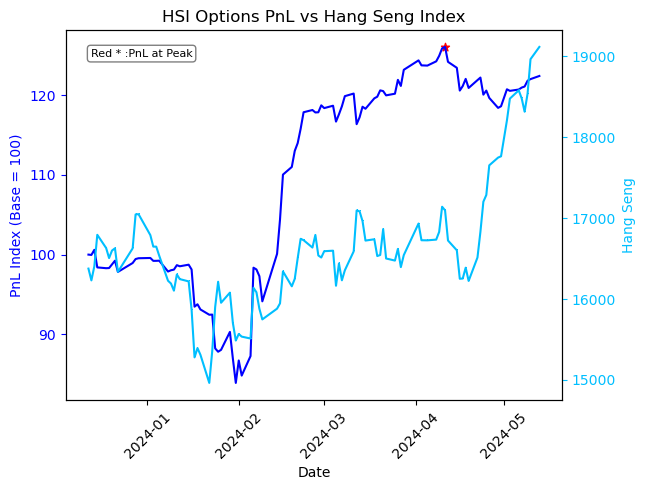

In [7]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(Date, y2, color='deepskyblue', marker=',')
ax2.set_ylabel('Hang Seng', color='deepskyblue')
ax2.tick_params('y', colors='deepskyblue')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('HSI Options PnL vs Hang Seng Index')
plt.show()

In [8]:
#Pnl vs HK's Hang Seng VIX
HSI_VIX = df["HSI VIX"]
HSI_VIX 

0      23.90
1      22.84
2      22.36
3      22.49
4      22.81
       ...  
96     22.94
97     22.04
98     21.86
99     22.27
100    22.39
Name: HSI VIX, Length: 101, dtype: float64

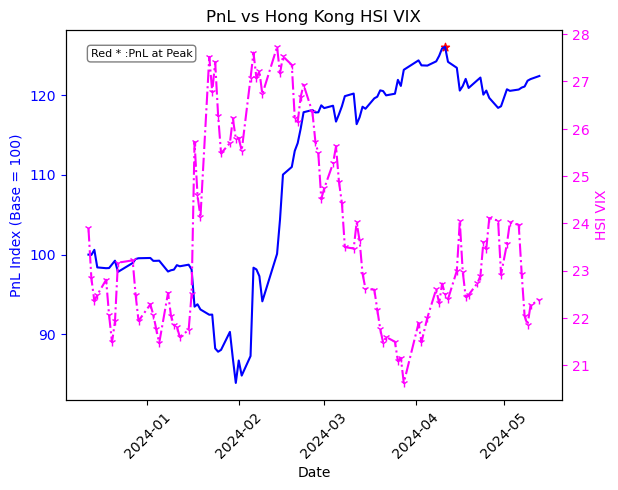

In [9]:
# Create the plot and set the first y-axis (left)
fig, ax1 = plt.subplots()
plt.xticks(rotation=45)
ax1.plot(Date, y1, 'b-')
ax1.scatter(max_pnl_date, max_pnl, color='red', marker='*')
ax1.set_xlabel('Date')
ax1.set_ylabel('PnL Index (Base = 100)', color='b')
ax1.tick_params('y', colors='b')

# Set the second y-axis (right)
ax3 = ax1.twinx()
ax3.plot(Date, HSI_VIX , 'fuchsia', marker='1', linestyle='-.')
ax3.set_ylabel('HSI VIX', color='fuchsia')
ax3.tick_params('y', colors='fuchsia')

# Add message box
msg = "Red * :PnL at Peak"
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax1.text(0.05, 0.95, msg, transform=ax1.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Show the plot
plt.title('PnL vs Hong Kong HSI VIX')
plt.show()

In [10]:
##########################################Performance###############################################
#Sharpe ratio
# Read in the portfolio returns data from a CSV file
R_first=df["PnL Index"].iloc[0,]
R_first
R_last = df["PnL Index"].iloc[-1]  #Always excel's actual row-2
R_last
portfolio_returns=(R_last-R_first)/R_first
portfolio_returns



0.22361832107064572

In [11]:
daily_returns=df["Returns"]
daily_returns

0      0.000000
1     -0.000400
2      0.006362
3     -0.022109
4     -0.001017
         ...   
96     0.002009
97     0.001133
98     0.005952
99     0.001670
100    0.003202
Name: Returns, Length: 101, dtype: float64

In [12]:
# Max Drawdown Calculation for PnL Index
cumulative_returns = (1 + df["Returns"]).cumprod()
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns / cumulative_max) - 1
max_drawdown = drawdown.min()

print("Max Drawdown:", max_drawdown)

Max Drawdown: -0.16954136256170405


In [13]:
# Calculate the excess returns and standard deviation
risk_free_rate = 0.04  # Hong Kong HIBOR
#Source: https://www.hsbc.com.hk/mortgages/tools/hibor-rate/
excess_returns = portfolio_returns - risk_free_rate
std_dev = np.std(daily_returns)
print("Standard Deviation of Daily Return:", std_dev)

Standard Deviation of Daily Return: 0.020047609130474063


In [14]:
# Calculate the Sharpe ratio
Sharpe_Ratio = excess_returns / std_dev
print("Sharpe Ratio:", Sharpe_Ratio)

Sharpe Ratio: 9.159113182804942


In [15]:
# Convert 'Date' column to datetime if it is not already
df['Date'] = pd.to_datetime(df['Date'])

In [16]:

# Calculate the number of unique trading days
num_trading_days = df['Date'].nunique()
print("Number of Actual Trading Days:", num_trading_days)

Number of Actual Trading Days: 101


In [17]:
#Annualized Sharpe ratio
risk_free_rate_daily = (1 + risk_free_rate) ** (1/250) - 1
risk_free_rate_daily 
average_daily_returns = daily_returns.sum() / num_trading_days
print("Average Daily Returns:", average_daily_returns)

excess_daily_return=average_daily_returns-risk_free_rate_daily 
excess_daily_return

Annualized_Sharpe_Ratio=excess_daily_return/std_dev*np.sqrt(250)
print("Annualized Sharpe Ratio:", Annualized_Sharpe_Ratio)

Average Daily Returns: 0.0019981416462441014
Annualized Sharpe Ratio: 1.4521763154915324


In [18]:
# Calculate the Profit Factor
positive_returns = daily_returns[daily_returns > 0].sum()
negative_returns = daily_returns[daily_returns < 0].sum()

# Avoid division by zero
if negative_returns != 0:
    profit_factor = abs(positive_returns / negative_returns)
else:
    profit_factor = float('inf')

print("Profit Factor:", profit_factor)


Profit Factor: 1.4197139858178403


In [19]:
#Alpha
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame based on the 'Date' column to ensure chronological order
df = df.sort_values('Date')

# Calculate daily returns of the Hang Seng index as percentage change from the previous row
df['HSI_daily_return'] = df['Hang Seng'].pct_change()

# Calculate the mean of the daily returns of HSI
mean_HSI_return = df['HSI_daily_return'][1:].mean()

print("Mean Daily Return of Hang Seng:", mean_HSI_return)

#Portfolio Alpha
# Compute the mean returns
# Calculate daily returns of the PnL as percentage change from the previous row
df['PnL_daily_return'] = df['PnL Index'].pct_change()

# Calculate the mean (average) of the daily returns
mean_PnL_return = df['PnL_daily_return'][1:].mean()
print("Mean Daily Return of PnL:", mean_PnL_return)

# Compute beta
covariance = df['PnL_daily_return'].cov(df['HSI_daily_return'])

print("Covariance between PnL and Hang Seng daily returns:", covariance)
variance = df['HSI_daily_return'].var()
variance
beta = covariance / variance
beta

# Compute alpha (assuming risk-free rate is 0)
alpha = (mean_PnL_return - (risk_free_rate_daily  +beta * mean_HSI_return))*np.sqrt(250)
# Print alpha
print("Alpha: ", alpha)


Mean Daily Return of Hang Seng: 0.0016575263542628826
Mean Daily Return of PnL: 0.0022262343687731103
Covariance between PnL and Hang Seng daily returns: 0.00011802001862759068
Alpha:  0.01868730115533533


In [20]:
# Identify the dates when new peak PnL values occur
peak_pnl_dates = []
peak_pnl = df['PnL Index'].iloc[0]

for index, row in df.iterrows():
    if row['PnL Index'] > peak_pnl:
        peak_pnl = row['PnL Index']
        peak_pnl_dates.append(row['Date'])

# Calculate the number of days between each consecutive peak PnL date
days_between_peaks = []

for i in range(1, len(peak_pnl_dates)):
    days = (peak_pnl_dates[i] - peak_pnl_dates[i-1]).days
    days_between_peaks.append(days)

# Calculate the average number of days between peak PnL dates
if len(days_between_peaks) > 0:
    avg_days_between_peaks = sum(days_between_peaks) / len(days_between_peaks)
    print("Average number of days between new peak PnL values:", avg_days_between_peaks)
else:
    print("There are no new peak PnL values.")

Average number of days between new peak PnL values: 6.611111111111111


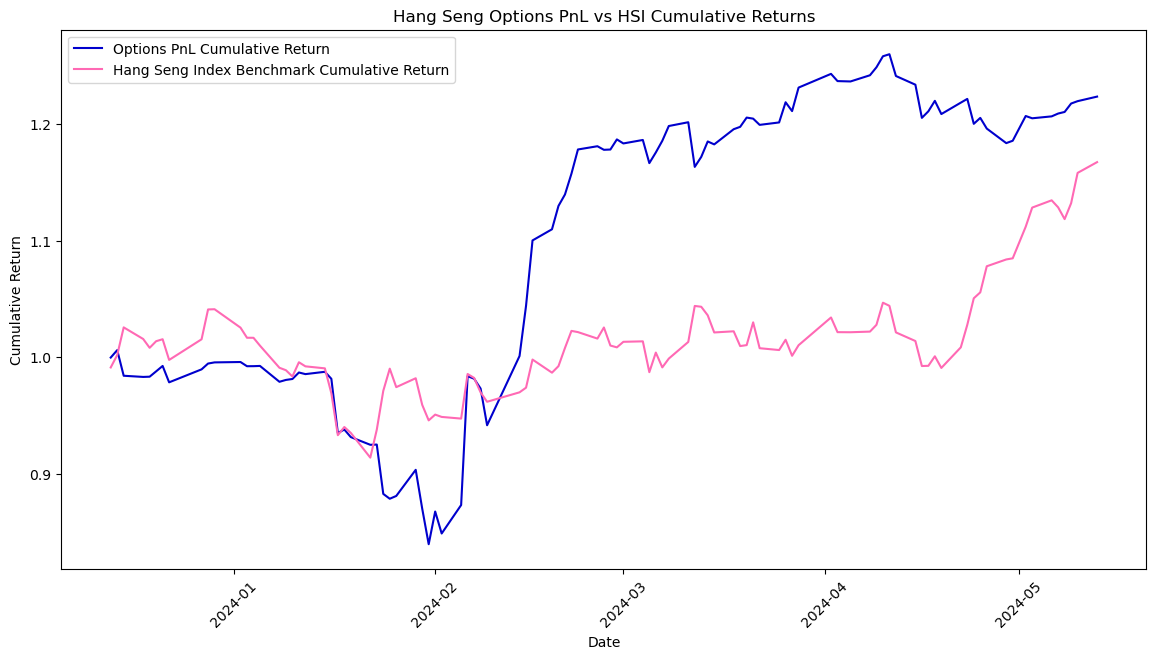

Performance difference between my Options PnL and HSI since the beginning: 0.05625076786291583


In [21]:
#Excess return of my Options PnL vesus the Hang Seng Index since the beginning
# Calculate daily returns for PnL and HSI
df['PnL_daily_return'] = df['PnL Index'].pct_change()
df['HSI_daily_return'] = df['Hang Seng'].pct_change()

# Calculate cumulative returns for PnL and HSI
df['PnL_cumulative_return'] = (1 + df['PnL_daily_return']).cumprod()
df['HSI_cumulative_return'] = (1 + df['HSI_daily_return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.xticks(rotation=45)
plt.plot(df['Date'], df['PnL_cumulative_return'], label='Options PnL Cumulative Return',  color='mediumblue')
plt.plot(df['Date'], df['HSI_cumulative_return'], label='Hang Seng Index Benchmark Cumulative Return', color='hotpink')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Hang Seng Options PnL vs HSI Cumulative Returns')
plt.legend()
plt.show()

# Calculate and print the performance difference
performance_difference = df['PnL_cumulative_return'].iloc[-1] - df['HSI_cumulative_return'].iloc[-1]
print(f"Performance difference between my Options PnL and HSI since the beginning: {performance_difference}")
